<a href="https://colab.research.google.com/github/Dhruv-958/BE/blob/main/DMV_WeatherApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

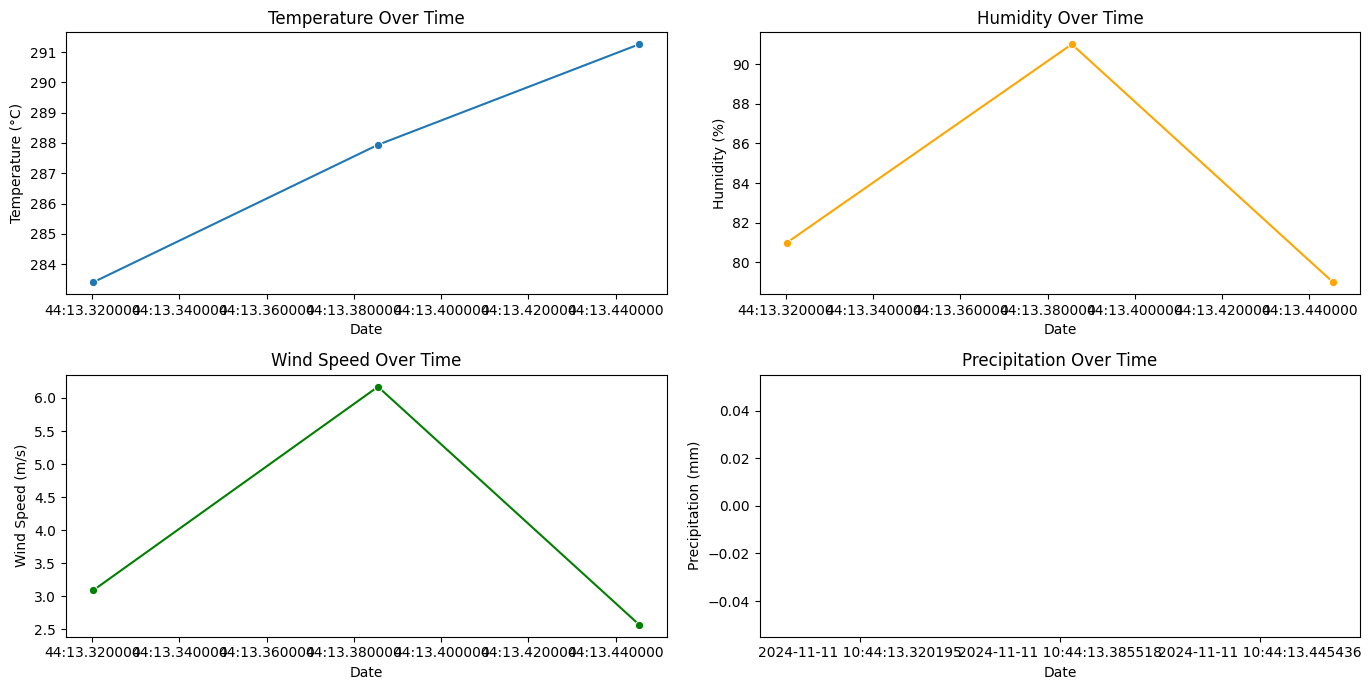

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define API key and base URL
API_KEY = '463cec557a6d7c01c45ee7587ef33965'  # Replace with your OpenWeatherMap API key
BASE_URL = 'http://api.openweathermap.org/data/2.5/weather?'
# Define function to get weather data
def get_weather_data(city_name, endpoint='weather'):
    url = BASE_URL + "appid=" + API_KEY + "&q=" + city_name
    response = requests.get(url)
    data = response.json()
    return data

# Define function to extract relevant weather attributes
def extract_weather_attributes(data):
    if data['cod'] != 200:
        print(f"Error: {data.get('message', 'Unknown error')}")
        return None

    weather_info = {
        'city': data['name'],
        'temperature': data['main']['temp'],
        'humidity': data['main']['humidity'],
        'wind_speed': data['wind']['speed'],
        'precipitation': data.get('rain', {}).get('1h', 0)  # 1h precipitation
    }
    return weather_info
# Define function to create a DataFrame from weather data
def create_dataframe(weather_list):
    df = pd.DataFrame(weather_list)
    return df

# Define function to visualize weather data
def visualize_weather_data(df):
    plt.figure(figsize=(14, 7))
    # Temperature over time
    plt.subplot(2, 2, 1)
    sns.lineplot(data=df, x='date', y='temperature', marker='o')
    plt.title('Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')

    # Humidity over time
    plt.subplot(2, 2, 2)
    sns.lineplot(data=df, x='date', y='humidity', marker='o', color='orange')
    plt.title('Humidity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Humidity (%)')

    # Wind Speed over time
    plt.subplot(2, 2, 3)
    sns.lineplot(data=df, x='date', y='wind_speed', marker='o', color='green')
    plt.title('Wind Speed Over Time')
    plt.xlabel('Date')
    plt.ylabel('Wind Speed (m/s)')

    # Precipitation over time
    plt.subplot(2, 2, 4)
    sns.barplot(data=df, x='date', y='precipitation', color='blue')
    plt.title('Precipitation Over Time')
    plt.xlabel('Date')
    plt.ylabel('Precipitation (mm)')
    plt.tight_layout()
    plt.show()

def main():
    cities = ['London', 'New York', 'Tokyo']  # Example cities
    weather_list = []

    # Retrieve and process weather data for each city
    for city in cities:
        data = get_weather_data(city)
        weather_info = extract_weather_attributes(data)
        if weather_info:
            weather_info['date'] = pd.to_datetime('today')  # Assuming same date for simplicity
            weather_list.append(weather_info)

    # Create a DataFrame and visualize data
    df = create_dataframe(weather_list)
    visualize_weather_data(df)

if __name__ == "__main__":
    main()